# Logistic Regression

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Predictions and Evaluations

# 1. Import Libraries

In [116]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression

# 2. Load Data

In [117]:
churn_data = pd.read_csv('Bank_dataset.csv',index_col='RowNumber')

# 3. Undertanding the Data

In [118]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [119]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [120]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [121]:
num_col = churn_data.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = churn_data.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Categorical columns: 
 Index(['Surname', 'Geography', 'Gender'], dtype='object')


# 4. Data pre - processing

In [1]:
##Dropping unncessary comments
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [123]:
##Hot Encoding for column "Geography"
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [124]:
##Label Encoding for Gender Column 
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [125]:
churn_data_encoded = Gender_dummies
churn_data_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# 5. Exploratory Data Analysis

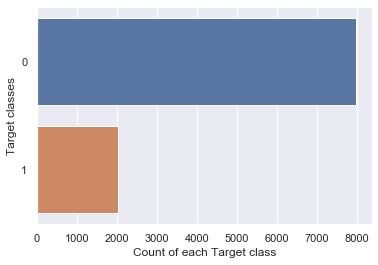

In [126]:
# To Check the distribution of y variable to see if it's a case of unbalanced class

sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

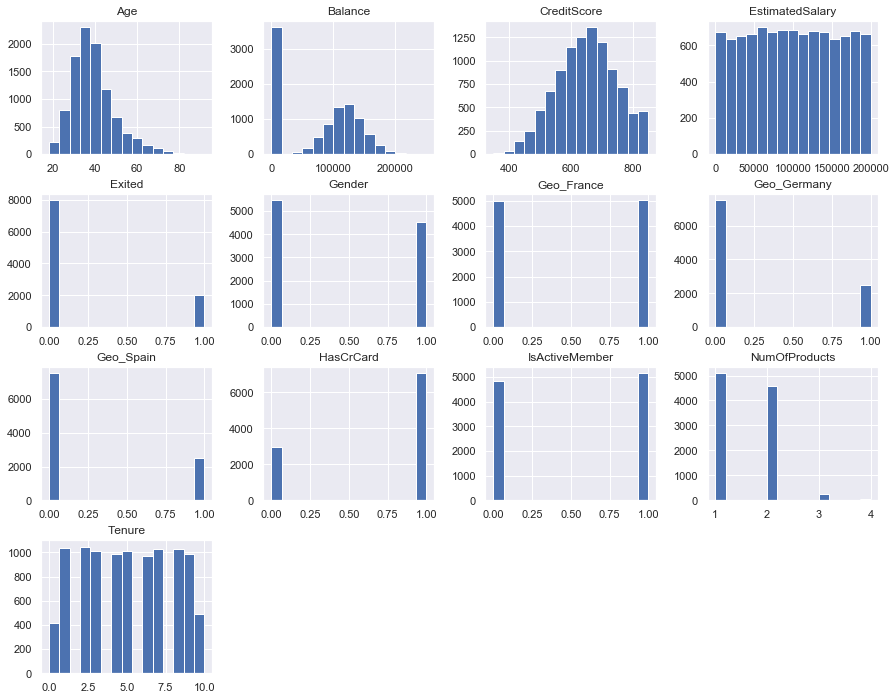

In [127]:
# To check the distribution of all the features

churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

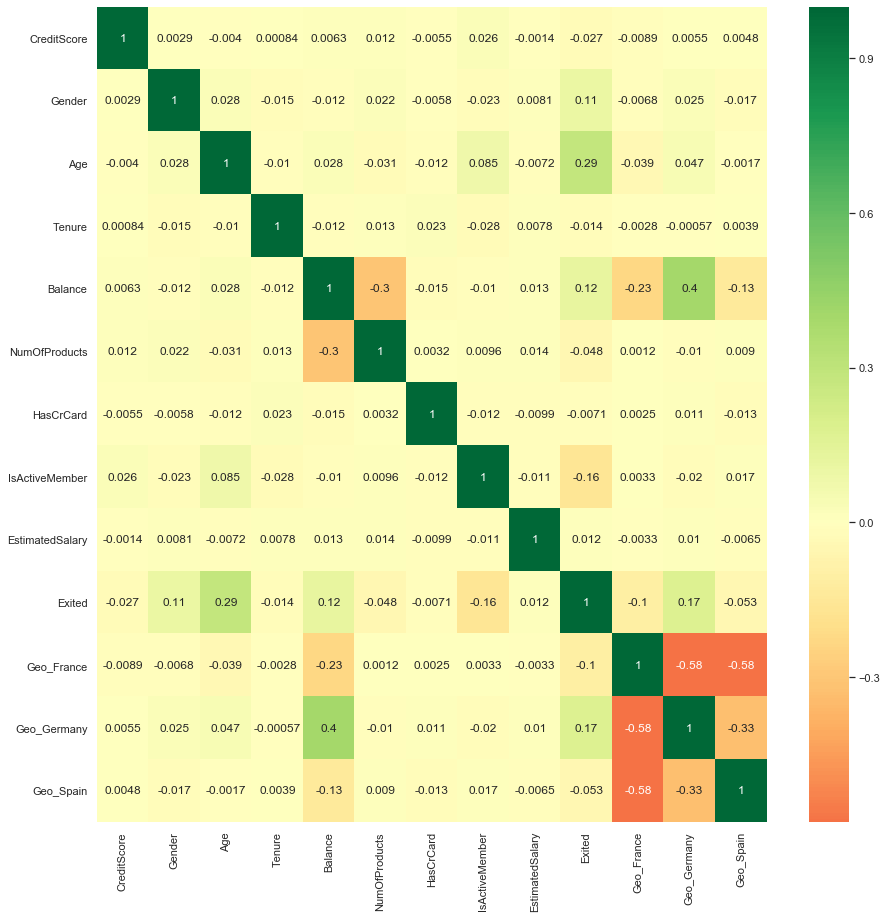

In [128]:
#To Check Multi-Collinearity
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0) 

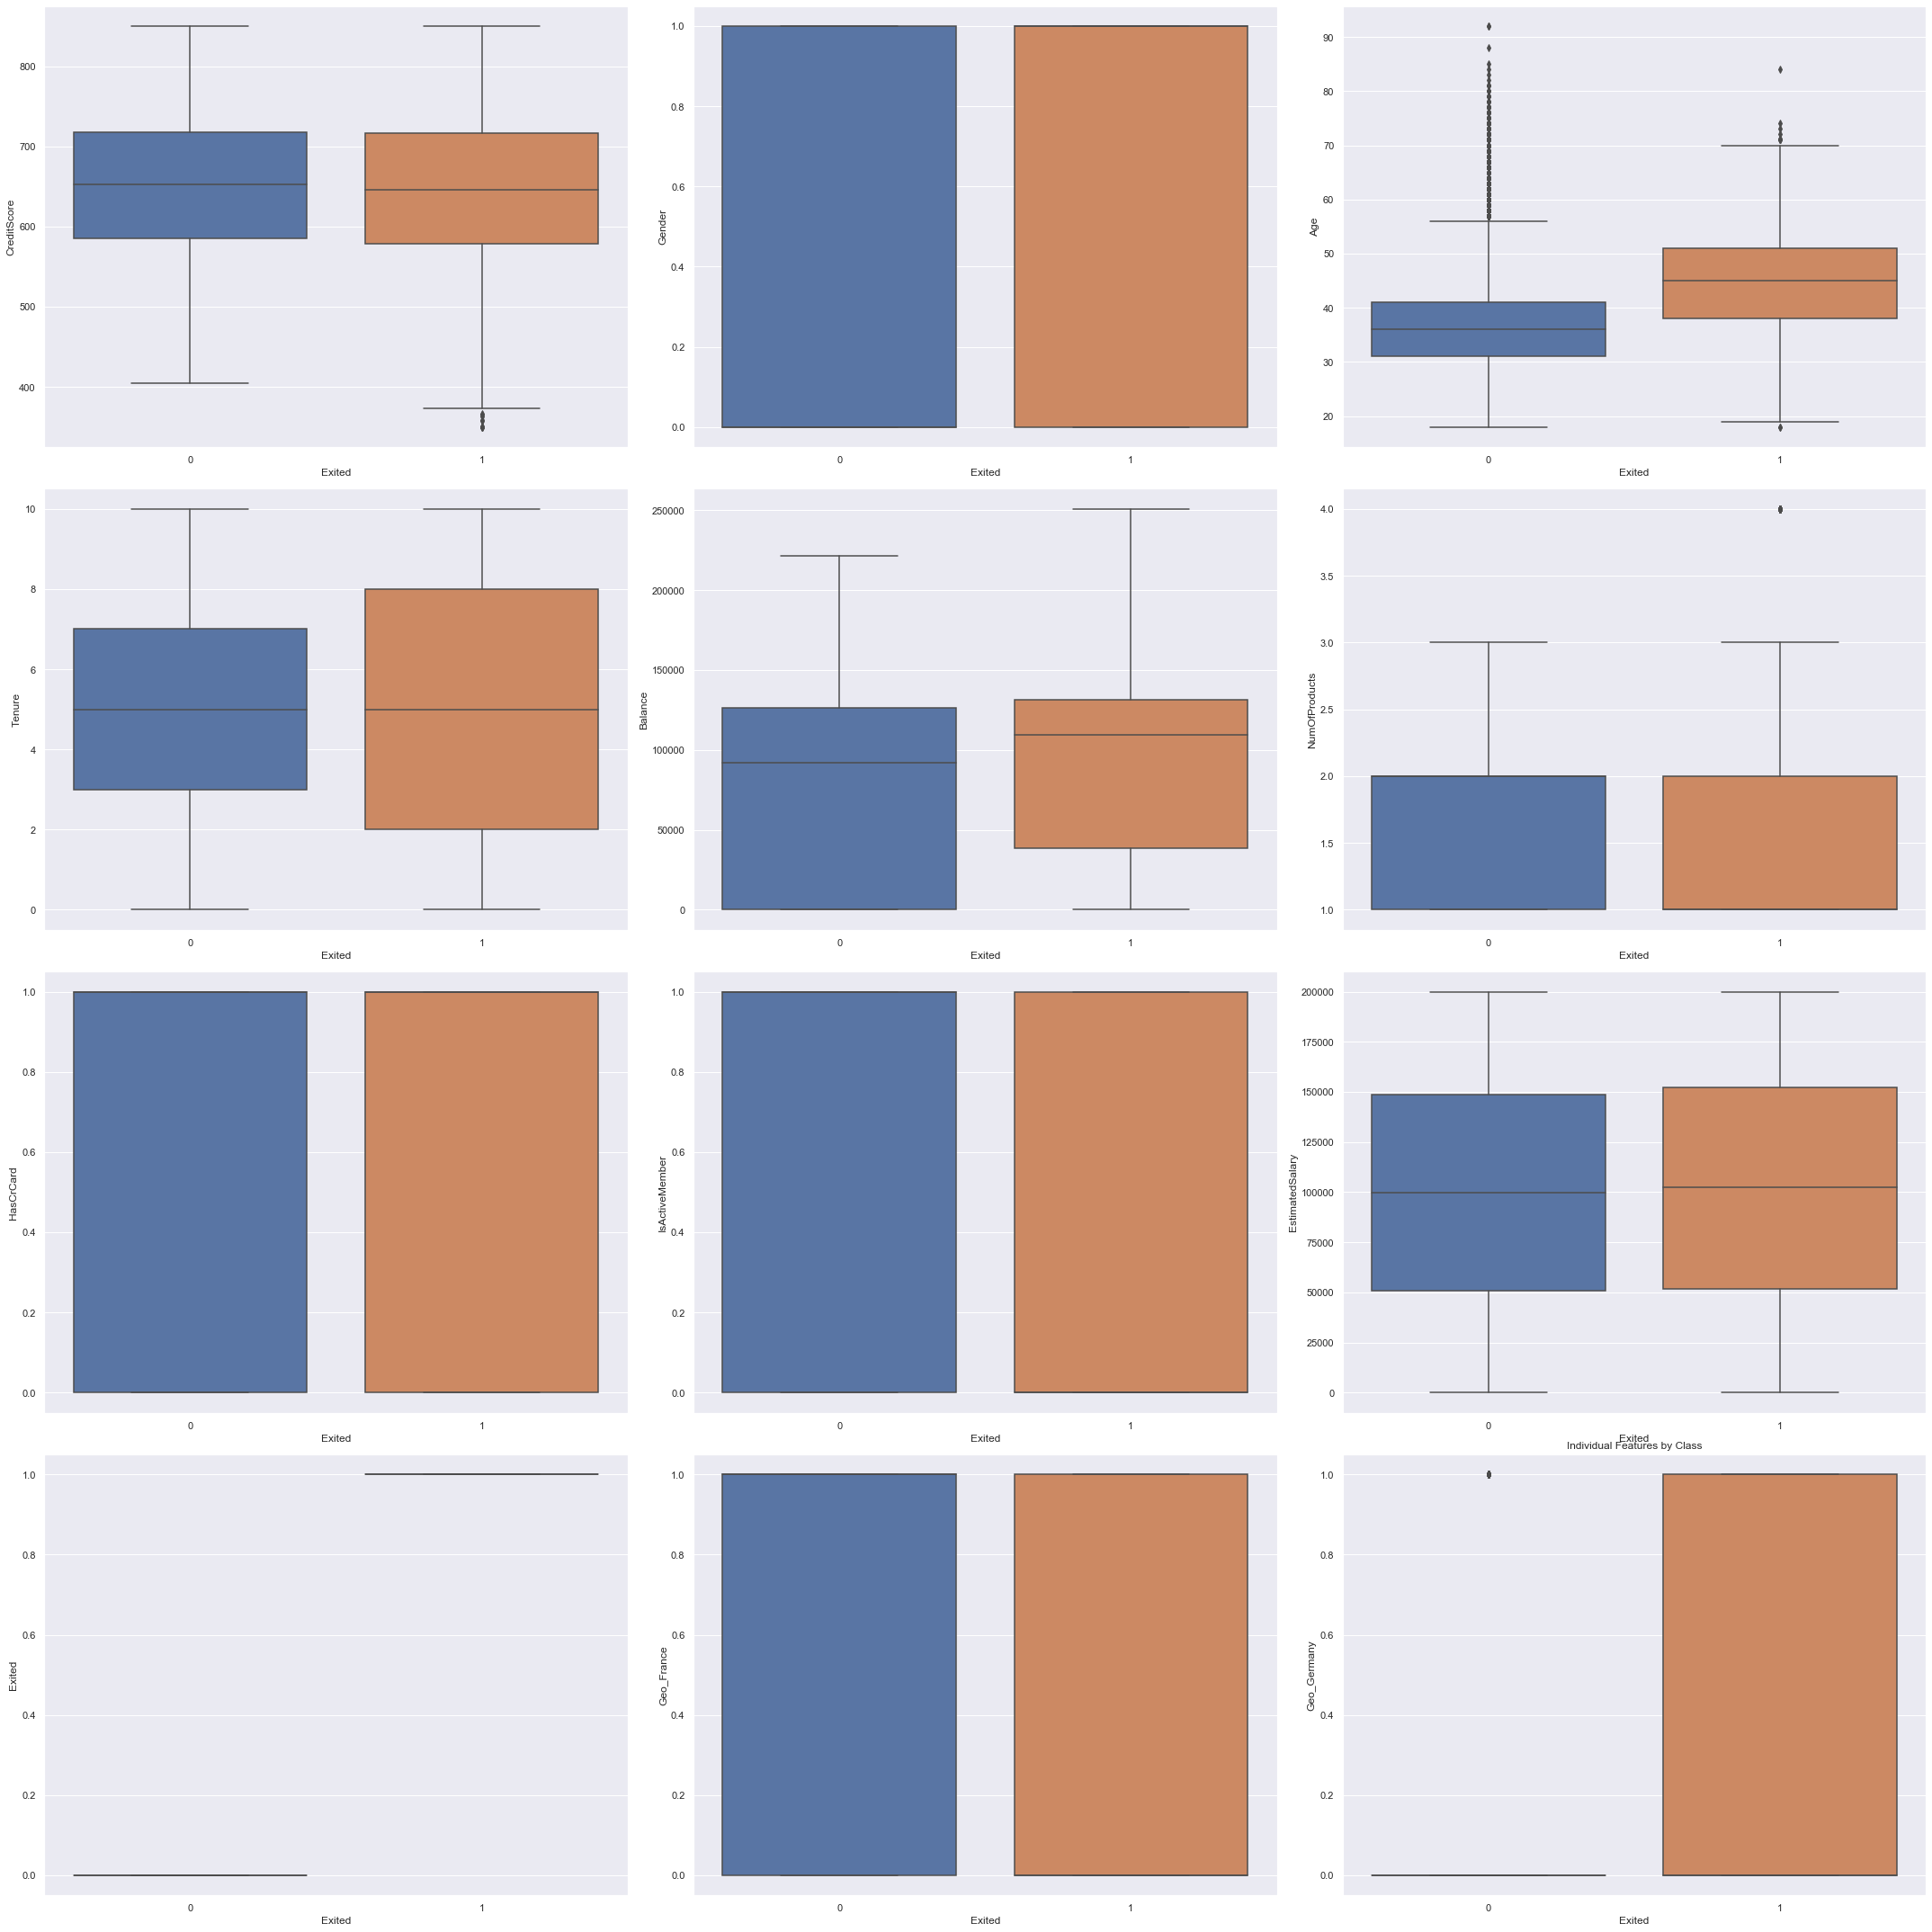

In [129]:
# To Check the distribution of y variable corresponding to every feature/x variable 

fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

Here we can submit the data to the bank where we compare each possible variation factor for churning out of the customers. This gives the management team areas to improve on.

# 6. Model Building

In [130]:
# Split the y variable series and x variables dataset

X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [131]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [132]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression Classification

In [142]:

# Defining the model
lr = LogisticRegression()

# Training the model:
lr.fit(X_train, y_train)



array([0, 0, 0, ..., 0, 1, 0])

# 7. Predictions and Performance Metric

In [148]:
# Predicting target values by using x_test and our model:
y_pred0 = lr.predict(X_test)

lr_probs = lr.predict_proba(X_test)

y_pred0

array([0, 0, 0, ..., 0, 1, 0])

### 1. Accuracy

In [143]:
# Checking the performance of logistic regression model

score_lr = lr.score(X_test, y_test)
print(score_lr)

0.8075757575757576


<a id="1"></a> <br>
### 2. Confusion Metric

In [144]:
# Python script for confusion matrix creation. 

actual = y_test
predicted = y_pred0 
results = confusion_matrix(actual, predicted) 


print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[2511  106]
 [ 529  154]]


#### `Summary` : 

The rows in the confusion matrix are the count of predicted 0’s and 1’s (from y_pred0), while, the columns are the actuals (from y_test).

So, you have 2511 out of 3040 `0` instances predicted as `0` and 154 out of 260 `1` instances predicted as `1`. This is good.

Secondly, look at the 106 in top-right of the table. This means the model predicted 106 instance as `0` which were actually `1`.

This is a classic case of `False Negative` or `Type II error`. You want to avoid this at all costs, because, it says the customer is with us when he/she has churned out.

Also, the model predicted 529 instances as `1` when the real value is `0`. This is called `False Positive` or `Type I error`. This condition should also be avoided but in this case is not as dangerous as Type II error.

# 8. Handle Class Imbalance

In [139]:
from imblearn.over_sampling import RandomOverSampler

X = churn_data_encoded.drop(['Exited'], axis = 1)
y = churn_data_encoded.Exited

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

y_ros.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [140]:
def classification_model(X,y,class_weight = None):
    
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
    
    # Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Defining the model
    lr = LogisticRegression(class_weight = class_weight)

    # Training the model:
    lr.fit(X_train, y_train)

    # Predicting target values by using x_test and our model:
    y_pred0 = lr.predict(X_test)
    lr_probs = lr.predict_proba(X_test)
    
    results = confusion_matrix(y_test, y_pred0) 


    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score :',accuracy_score(y_test, y_pred0) )
    print ('Report : ')
    print (classification_report(y_test, y_pred0))
    
def performance_metric(actual,predicted):
    
    results = confusion_matrix(actual, predicted) 


    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score :',accuracy_score(actual, predicted) )
    print ('Report : ')
    print (classification_report(actual, predicted))

In [141]:
classification_model(X_ros,y_ros)

Confusion Matrix :
[[1877  747]
 [ 774 1858]]
Accuracy Score : 0.7106164383561644
Report : 
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      2624
           1       0.71      0.71      0.71      2632

    accuracy                           0.71      5256
   macro avg       0.71      0.71      0.71      5256
weighted avg       0.71      0.71      0.71      5256

